<a href="https://colab.research.google.com/github/Datamin-D/tensorflow-ml-nlp-tf2/blob/master/%EC%95%B5%EB%AC%B4%EC%83%88%EC%B1%85_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C2%EC%99%80_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%9C%BC%EB%A1%9C_%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94_%EC%9E%90%EC%97%B0%EC%96%B4_%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import preprocessing
import numpy as np

In [ ]:
#Dense layer
INPUT_SIZE = (20,1)
inputs = tf.keras.layers.Input(shape = INPUT_SIZE)
outputs = tf.keras.layers.Dense(units = 10,activation = tf.nn.sigmoid)(inputs)

In [ ]:
#Dropout - to prevent models from overfitting by regularization
dropout = tf.keras.layers.Dropout(...)
output = dropout(input)



In [ ]:
# Conv1D 
conv1d = tf.keras.layers.Conv1D(...)
output = conv1d(input)


In [ ]:
# dummy sentiment analysis

samples = ['너 오늘 이뻐 보인다',
          '나는 오늘 기분이 더러워',
          '끝내주는데, 좋은 일이 있나봐',
          '나 좋은 일이 생겼어',
          '아 오늘 진짜 짜증나',
          '환상적인데, 정말 좋은거 같아']

targets =[[1], [0], [1], [1], [0], [1]]

tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
input_sequences = np.array(sequences)
labels = np.array(targets)

word_index = tokenizer.word_index

# sklearn

In [ ]:
#특징 추출 - countvectorizer,tfidfvectorizer

#CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
text_data = ['나는 배가 고프다', '내일 점심 뭐먹지', '내일 공부 해야겠다', '점심 먹고 공부 해야지']

count_vectorizer = CountVectorizer()
count_vectorizer.fit(text_data)
count_vectorizer.vocabulary_ # 단어 사전 생김.

{'고프다': 0,
 '공부': 1,
 '나는': 2,
 '내일': 3,
 '먹고': 4,
 '뭐먹지': 5,
 '배가': 6,
 '점심': 7,
 '해야겠다': 8,
 '해야지': 9}

In [ ]:
sentence = [text_data[0]]
print(count_vectorizer.transform(sentence).toarray())

[[1 0 1 0 0 0 1 0 0 0]]


# NLP tokenizing tool

## nltk

In [ ]:
import nltk

nltk.download('all-corpora')
nltk.download('punkt')

[nltk_data] Downloading collection 'all-corpora'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    | 

True

In [ ]:
from nltk.tokenize import word_tokenize

sentence = "Natural language processing (NLP) is a subfield of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data."

print(word_tokenize(sentence))

['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'subfield', 'of', 'computer', 'science', ',', 'information', 'engineering', ',', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', '(', 'natural', ')', 'languages', ',', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data', '.']


In [ ]:

from nltk.tokenize import sent_tokenize

paragraph = "Natural language processing (NLP) is a subfield of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data. Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural language generation."

print(sent_tokenize(paragraph))

['Natural language processing (NLP) is a subfield of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.', 'Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural language generation.']


## spacy 

In [ ]:
import spacy
nlp = spacy.load('en')

sentence = "Natural language processing (NLP) is a subfield of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data."

doc = nlp(sentence)

## konlpy

In [ ]:
! pip install konlpy
import konlpy
from konlpy.tag import Okt

     |████████████████████████████████| 19.4MB 42.8MB/s 
     |████████████████████████████████| 92kB 9.7MB/s 
     |████████████████████████████████| 460kB 44.3MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


In [ ]:
okt = Okt()
text = "한글 자연어 처리는 재밌다 이제부터 열심히 해야지ㅎㅎㅎ"
print(okt.morphs(text))
print(okt.morphs(text,stem = True)) #어간 True옵션준거. 

['한글', '자연어', '처리', '는', '재밌다', '이제', '부터', '열심히', '해야지', 'ㅎㅎㅎ']
['한글', '자연어', '처리', '는', '재밌다', '이제', '부터', '열심히', '하다', 'ㅎㅎㅎ']


In [ ]:
print(okt.nouns(text)) #명사뽑기
print(okt.phrases(text)) #어절

['한글', '자연어', '처리', '이제']
['한글', '한글 자연어', '한글 자연어 처리', '이제', '자연어', '처리']


In [ ]:
print(okt.pos(text)) #품사태깅
print(okt.pos(text,join = True)) # 품사까지 붙여서 태깅  

[('한글', 'Noun'), ('자연어', 'Noun'), ('처리', 'Noun'), ('는', 'Josa'), ('재밌다', 'Adjective'), ('이제', 'Noun'), ('부터', 'Josa'), ('열심히', 'Adverb'), ('해야지', 'Verb'), ('ㅎㅎㅎ', 'KoreanParticle')]
['한글/Noun', '자연어/Noun', '처리/Noun', '는/Josa', '재밌다/Adjective', '이제/Noun', '부터/Josa', '열심히/Adverb', '해야지/Verb', 'ㅎㅎㅎ/KoreanParticle']


In [ ]:
# datasets
from konlpy.corpus import kolaw
from konlpy.corpus import kobill

kolaw.open('constitution.txt').read()[:41]

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 '

In [ ]:
kobill.open('1809890.txt').read()

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

# 04 텍스트 분류

## 데이터 로드

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
path = '/gdrive/MyDrive/ML DL Books/앵무새책-텐서플로2와 머신러닝으로 시작하는 자연어 처리'
train_data =pd.read_csv(path+'/labeledTrainData.tsv',header = 0,delimiter='\t', quoting = 3  ) # tsv는 tab seperated values
#pd.read_csv(header = 컬럼으로 쓸 행,quoting = 3은 큰따옴표 무시 )
train_data

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."
...,...,...,...
24995,"""3453_3""",0,"""It seems like more consideration has gone int..."
24996,"""5064_1""",0,"""I don't believe they made this film. Complete..."
24997,"""10905_3""",0,"""Guy is a loser. Can't get girls, needs to bui..."
24998,"""10194_3""",0,"""This 30 minute documentary Buñuel made in the..."


In [ ]:
train_data

## 기초통계

In [6]:
#데이터의 크기 분석
for file  in os.listdir(path): #os.listdir(디렉토리)) 은 디렉토리 안의 모든 파일을 리스트 형태로 리턴함. 디렉토리 지정안하면 working directory에서  찾음.
  if 'tsv' in file and 'zip' not in file:
    print(file.ljust(30)+str(round(os.path.getsize(path+'/'+file)/ 1000000,2)) + 'MB') # string.ljust(칸수,채울값) 채울 값 없을 시 공백으로 채움 


unlabeledTrainData.tsv        67.28MB
labeledTrainData.tsv          33.56MB
testData.tsv                  32.72MB


In [7]:
print('전체 학습 데이터의 개수: {}'.format(len(train_data))) # df에 바로 len 하면 행 개수 확인 가능.

전체 학습 데이터의 개수: 25000


In [8]:
train_length = train_data['review'].apply(len) #바로도 되네. train_data['review'].apply(lambda x: len(x)) 랑 같음.
print('max length',train_length.max())
print('min length',train_length.min())


max length 13710
min length 54


Text(0, 0.5, 'Number of review')

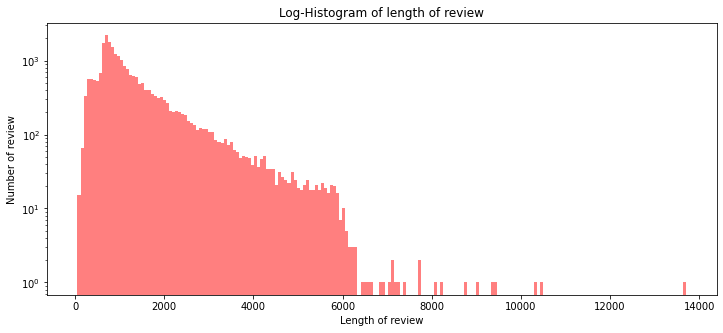

In [9]:
# review length 세기 

plt.figure(figsize  = (12,5)) #plt.figure(figsize = (가로,세로)) 이렇게 plot 크기 조절 가능
#히스토그램 선언
plt.hist(train_length,bins = 200,alpha = 0.5, color = 'r',label = 'word')
plt.yscale('log',nonposy = 'clip') # plt.yscale(스케일 방법),nonposy = 음수 값 어케할지-->'clip'하면 아주 작은값으로 줌) 
plt.title('Log-Histogram of length of review')
plt.xlabel('Length of review')
plt.ylabel('Number of review')

In [10]:
print('리뷰 길이의 최대값:{}'.format(np.max(train_length)))
print('리뷰 길이의 최소값:{}'.format(np.min((train_length))))
print('리뷰 길이의 평균값:{:.2f}'.format(np.mean(train_length)))
print('리뷰 길이의 표편:{:.2f}'.format(np.std(train_length)))
print('리뷰 길이의 중간값:{}'.format(np.median(train_length)))
#사분위의 SCALE은  0~100사이임.
print('리뷰 길이의 1사분위 :{}'.format(np.percentile(train_length, 25))) # 백분위 25퍼임, 하위 25퍼. np.percentile(데이터,백분위)
print('리뷰 길이의 3사분위:{}'.format(np.percentile(train_length, 75))) # 백분위 75퍼임. 상위 25퍼.

리뷰 길이의 최대값:13710
리뷰 길이의 최소값:54
리뷰 길이의 평균값:1329.71
리뷰 길이의 표편:1005.22
리뷰 길이의 중간값:983.0
리뷰 길이의 1사분위 :705.0
리뷰 길이의 3사분위:1619.0


{'boxes': [<matplotlib.lines.Line2D at 0x7fdaccfcd150>],
 'caps': [<matplotlib.lines.Line2D at 0x7fdacd001110>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdaccf88690>],
 'means': [<matplotlib.lines.Line2D at 0x7fdaccf88150>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdacd001bd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fdacd54b3d0>,
  <matplotlib.lines.Line2D at 0x7fdaccfcdb90>]}

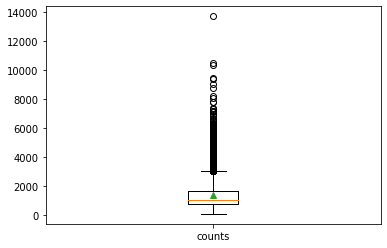

In [11]:
# boxplot 그려보기
plt.boxplot(train_length, labels = ['counts'],showmeans = True)# labels = [] # showmeans = True하면 세모모양으로 나옴. 선은 median

(-0.5, 799.5, 599.5, -0.5)

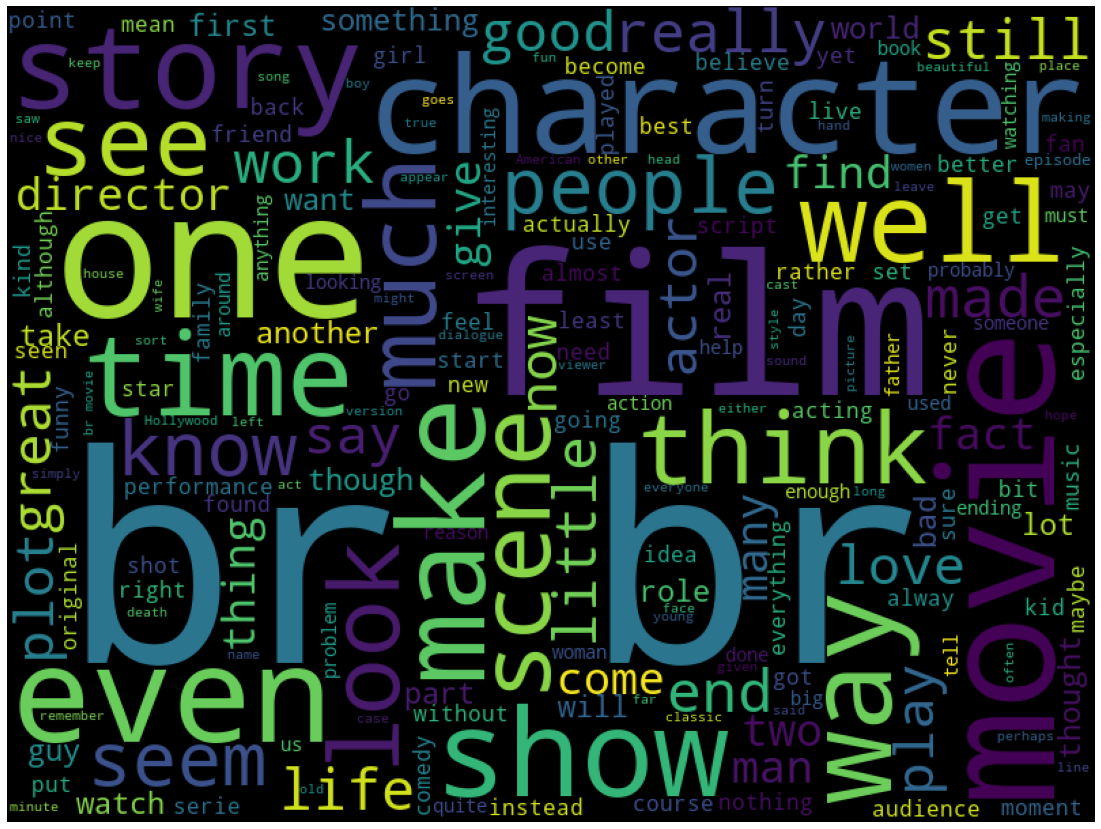

In [12]:
# word cloud 그리기
from wordcloud import WordCloud
cloud = WordCloud(width = 800, height = 600).generate(" ".join(train_data['review'])) #" ".join() 은 " "로 각 element 연결해줌,

plt.figure(figsize = (20,15))
plt.imshow(cloud)
plt.axis('off') #axis 없애기 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


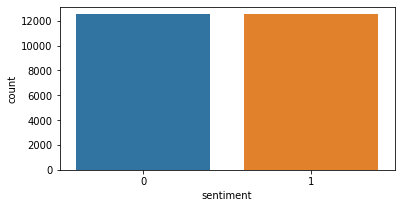

In [13]:
# target 분포 확인
f, a = plt.subplots(ncols = 1)
f.set_size_inches(6,3)
sns.countplot(train_data['sentiment'])

In [14]:
print("긍정리뷰:",train_data['sentiment'].value_counts()[1])
print("부정리뷰:",train_data['sentiment'].value_counts()[0])

긍정리뷰: 12500
부정리뷰: 12500


In [15]:
# 리뷰당 단어 개수 확인
train_word_counts = train_data['review'].apply(lambda x : len(x.split(' '))) # tes.split('aaa') aaa를 기준으로 split하여 리스트로 반환
train_word_counts

0        433
1        158
2        378
3        379
4        367
        ... 
24995     95
24996    174
24997    127
24998    197
24999    184
Name: review, Length: 25000, dtype: int64

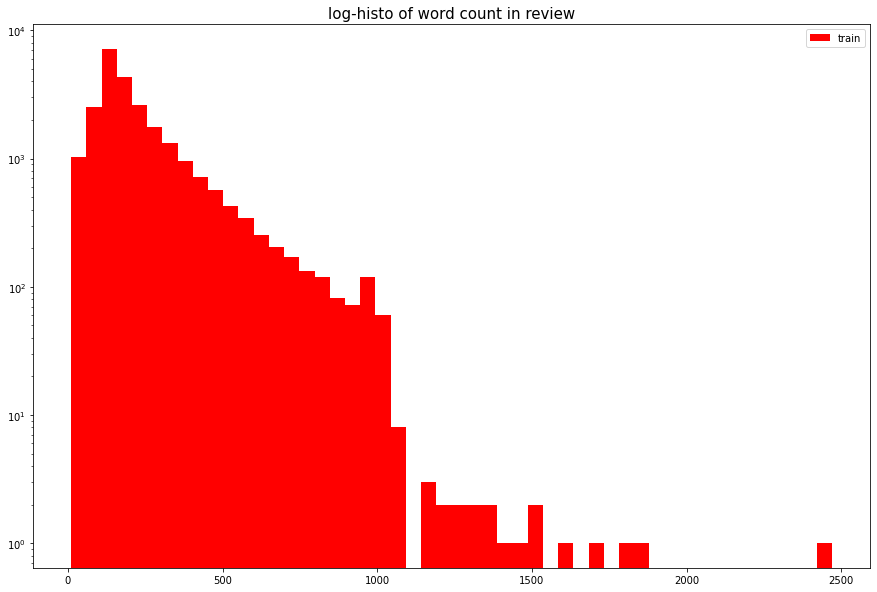

In [16]:
plt.figure(figsize = (15,10))
plt.hist(train_word_counts,bins = 50, facecolor = 'r', label = 'train')
plt.title('log-histo of word count in review', fontsize = 15)
plt.yscale('log',nonposy = 'clip')
plt.legend()


In [18]:
# 구두점, 대소문자 비율 보기.
qmarks = np.mean(train_data['review'].apply(lambda x: '?' in x)) # bool과 np.mean을 조합하면 한번에 조건 True에 맞는 통계 구할 수.
fullstop = np.mean(train_data['review'].apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_data['review'].apply(lambda x: x[0].isupper())) #첫번째 대문자
np.mean(train_data['review'].apply(lambda x: max([y.isupper() for y in x]))) #대문자 개수
np.mean(train_data['review'].apply(lambda x: mean([y.isdigit() for y in x]))) # strinf에 for문 돌리면 낱말하나하나 일일이 검사함. 
# %로 나타낼라해서 mean임.

NameError: ignored

In [19]:
np.mean(train_data['review'].apply(lambda x: max([y.isdigit() for y in x]))) #

0.56656

In [ ]:
a = "1 or 2 min"
np.mean([b.isdigit()for  b in a])
  

## Preprocessing

In [48]:
import re
import pandas as pd
import numpy as np
import json
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

In [49]:
review = train_data['review'][0]
review_text = BeautifulSoup(review,"html5lib").get_text() # HTML 태그 제거
review_text = re.sub("[^a-zA-Z]"," ",review_text) # re.sub(패턴,바꿀문자열, 문자열) +나 * 안써도 되네..?
review_text

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    m

In [50]:
import nltk
nltk.download('stopwords')

stopwords = stopwords.words('english') # 영어 불용어 set을 만든다--> 오류남.,

review_text = review_text.lower() #소문자
words = review_text.split() #소문자 단어리스트
words = [w for w in words if not w in stopwords]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
clean_review = ' '.join(words)
clean_review

'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

In [52]:
review_text

' with all this stuff going down at the moment with mj i ve started listening to his music  watching the odd documentary here and there  watched the wiz and watched moonwalker again  maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  some of it has subtle messages about mj s feeling towards the press and also the obvious message of drugs are bad m kay visually impressive but of course this is all about michael jackson so unless you remotely like mj in anyway then you are going to hate this and find it boring  some may call mj an egotist for consenting to the making of this movie but mj and most of his fans would say that he made it for the fans which if true is really nice of him the actual feature film bit when it finally starts is only on for    m

In [53]:
def preprocessing(review, remove_stopwords = False):
  # 불용어 제거는 옵션으로 가능.
  #1. HTML 제거
  reveiw_text = BeautifulSoup(review,"html5lib").get_text()

  #2. 영어가 아닌 특수문자를 공백으로 바꾸기
  review_texts = re.sub("[^a-zA-Z]"," ",review_text)

  #3. 대문자를 소문자로 바꾸고 공백 단위로 텍스트 나눠 리스트 만들기
  words = review_texts.lower().split()
  
  #4. 불용어 제거
  if remove_stopwords:
    # stopwords = stopwords.words('english') # 안되면 없이해보셈
    words = [w for w in words if not w in stopwords] # 불용어 아닌 단어로 이뤄진 새 리스트 생성
  #5. 단어 리스트를 공백에 넣어서 하나의 글로
    clean_review = ' '.join(words)
  else: #불용어 제거하지 않을때
    clean_review = ' '.join(words)
  return clean_review

In [54]:
clean_train_reviews = []
for review in  train_data['review']:
  clean_train_reviews.append(preprocessing(review, remove_stopwords= True))

clean_train_reviews[0]

'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

In [55]:
# clean review, sentiment 
claen_train_df = pd.DataFrame({'reveiw' : clean_train_reviews, 'sentiment' : train_data['sentiment']})
claen_train_df

,reveiw,sentiment
0,stuff going moment mj started listening music ...,1
1,stuff going moment mj started listening music ...,1
2,stuff going moment mj started listening music ...,0
3,stuff going moment mj started listening music ...,0
4,stuff going moment mj started listening music ...,1
...,...,...
24995,stuff going moment mj started listening music ...,0
24996,stuff going moment mj started listening music ...,0
24997,stuff going moment mj started listening music ...,0
24998,stuff going moment mj started listening music ...,0


In [56]:
# Text to Index
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_reviews) #fit
text_sequences = tokenizer.texts_to_sequences(clean_train_reviews) # 실제로 바꿈
text_sequences[0]

[33,
 4,
 34,
 1,
 35,
 36,
 11,
 37,
 38,
 39,
 12,
 40,
 12,
 13,
 5,
 41,
 42,
 43,
 44,
 14,
 45,
 15,
 16,
 46,
 5,
 47,
 48,
 49,
 17,
 50,
 13,
 18,
 51,
 18,
 19,
 20,
 52,
 4,
 53,
 54,
 55,
 56,
 57,
 58,
 1,
 59,
 60,
 61,
 21,
 62,
 22,
 23,
 6,
 63,
 64,
 65,
 66,
 24,
 25,
 67,
 68,
 7,
 1,
 69,
 4,
 26,
 70,
 71,
 72,
 73,
 1,
 74,
 75,
 76,
 8,
 1,
 27,
 77,
 78,
 79,
 27,
 80,
 15,
 28,
 81,
 19,
 20,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 9,
 29,
 30,
 89,
 90,
 91,
 92,
 93,
 94,
 1,
 95,
 6,
 96,
 1,
 97,
 98,
 99,
 29,
 30,
 100,
 101,
 102,
 2,
 10,
 103,
 23,
 104,
 105,
 5,
 106,
 1,
 11,
 107,
 16,
 108,
 7,
 1,
 109,
 110,
 111,
 31,
 112,
 113,
 9,
 21,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 6,
 9,
 121,
 122,
 26,
 123,
 3,
 124,
 125,
 126,
 31,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 8,
 2,
 7,
 1,
 3,
 134,
 135,
 136,
 2,
 137,
 138,
 139,
 140,
 141,
 22,
 142,
 1,
 143,
 144,
 8,
 145,
 24,
 25,
 146,
 3,
 147,
 2,
 148,
 149,
 150,
 17,
 32,
 151,

In [57]:
# word:index 사전. 
word_vocab = tokenizer.word_index # 하면 단어:index 볼 수 있음.
word_vocab["<PAD>"] = 0
word_vocab

{'<PAD>': 0,
 'actual': 81,
 'alone': 126,
 'also': 21,
 'another': 135,
 'anyway': 69,
 'attention': 151,
 'away': 138,
 'bad': 6,
 'behind': 156,
 'bestest': 143,
 'beyond': 96,
 'biography': 51,
 'bit': 82,
 'boring': 71,
 'bottom': 132,
 'buddy': 144,
 'bunch': 127,
 'call': 73,
 'came': 118,
 'car': 110,
 'certain': 43,
 'character': 100,
 'cinema': 54,
 'closed': 157,
 'complex': 129,
 'consenting': 75,
 'convincing': 89,
 'cool': 16,
 'course': 66,
 'criminal': 88,
 'dance': 130,
 'dead': 95,
 'demon': 113,
 'different': 155,
 'director': 114,
 'directors': 122,
 'documentary': 39,
 'doors': 158,
 'drug': 92,
 'drugs': 23,
 'dunno': 105,
 'egotist': 74,
 'eighties': 46,
 'either': 160,
 'etc': 104,
 'ever': 148,
 'excluding': 86,
 'extremely': 161,
 'fact': 159,
 'fans': 27,
 'feature': 19,
 'feeling': 59,
 'film': 20,
 'filming': 119,
 'finally': 83,
 'find': 70,
 'gave': 152,
 'get': 42,
 'girl': 145,
 'give': 140,
 'going': 4,
 'grace': 149,
 'guilty': 17,
 'guy': 14,
 'hate'

In [58]:
len(word_vocab) # 딕셔너리에도 len(dict)하면 값 개수 구할 수 있음(키 기준)

167

In [59]:
# 데이터 정보. config 는 구성이라는뜻 (configuration)
data_configs = {}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) + 1


In [61]:
#Padding
MAX_SEQUENCE_LENGTH = 174
train_inputs = pad_sequences(text_sequences, maxlen = MAX_SEQUENCE_LENGTH, padding = 'post') #pad_sequences(데이터, maxlen = 길이,padding = 'pre' or 'post')
print(f"shape of the train data: {train_inputs.shape}")

shape of the train data: (25000, 174)


In [62]:
# target도 numpy 배열로 저장. (전처리한 데이터를 numpy 배열 형태로 저장하기 때문)
train_labels = np.array(train_data['sentiment'])
print('shape of label tensor:',train_labels.shape)

shape of label tensor: (25000,)


In [ ]:
# 데이터 저장
DATA_IN_PATH = '/gdrive/MyDrive/ML DL Books/앵무새책-텐서플로2와 머신러닝으로 시작하는 자연어 처리/data'
TRAIN_INPUT_DATA = 'train_input.npy'
TRAIN_LABEL_DATA = 'train_.npy'
TRAIN_CLEAN_DATA = 'train_.csv'
DATA_CONFIGS = 'data_configs.json'

import os
if not os.path.exists(DATA_OUT_PATH):
  os.makedirs()
